In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Classified Data')

In [6]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [8]:
df['TARGET CLASS'].unique()

array([1, 0])

In [10]:
df.tail()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
995,995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1
999,999,0.837460,0.961184,0.417006,0.799784,0.934399,0.424762,0.778234,0.907962,1.257190,1.364837,1


In [14]:
#df.columns
df.drop('Unnamed: 0',axis=1,inplace=True)

ValueError: labels ['Unnamed: 0'] not contained in axis

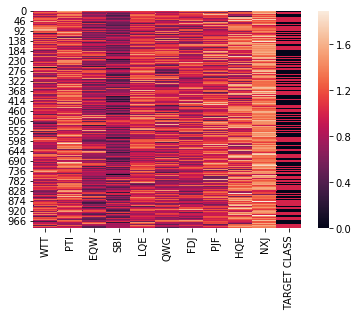

In [17]:
sns.heatmap(df)

In [18]:
# for knn we need to stadarize features values to same scale

In [19]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [23]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [31]:
df_scaled = pd.DataFrame(data=scaled_features,columns=df.columns[:-1])

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
X = df_scaled

In [37]:
y = df['TARGET CLASS']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [41]:
# knn

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier(n_neighbors=1)

In [46]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [56]:
predictions = knn.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [52]:
confusion_matrix(y_test,predictions)

array([[138,  14],
       [ 11, 137]])

In [54]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.93      0.91      0.92       152
          1       0.91      0.93      0.92       148

avg / total       0.92      0.92      0.92       300



In [55]:
## choose better k value with elbow method

In [67]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

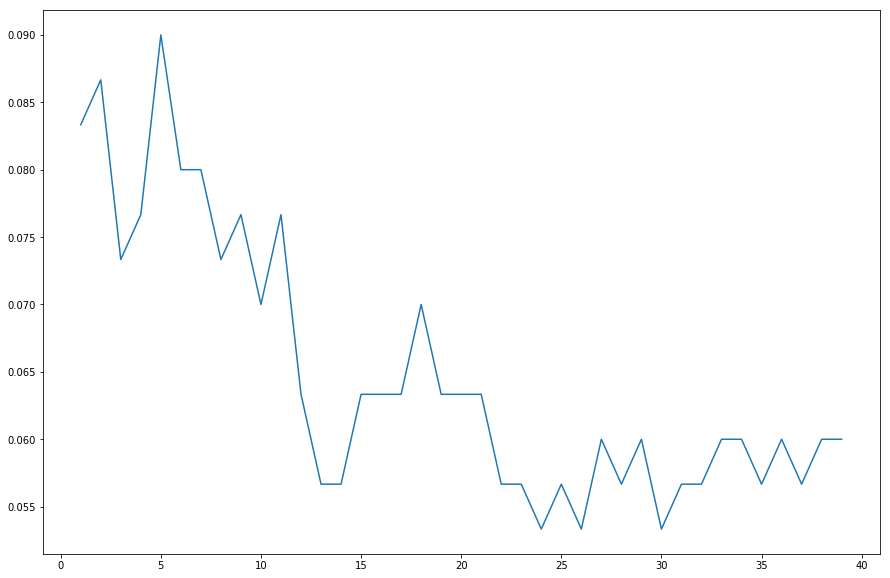

In [74]:
plt.figure(figsize=(15,10))
plt.plot(range(1,40),error_rate)

In [78]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
confusion_matrix(y_test,predictions)

array([[142,  10],
       [  6, 142]])

In [79]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.96      0.93      0.95       152
          1       0.93      0.96      0.95       148

avg / total       0.95      0.95      0.95       300

